This Jupyter Notebook plots and analyzes ligand-detected 19F pseudo-2D ligand-detected transverse (spin-spin, R2,eff) nuclear magnetic resonance spectroscopy (NMR) relaxation data of 5-fluoroindole in the absence and presence of varying concentrations of the non-structural protein 5A, domains 2 and 3 (NS5A-D2D3). Data should first be downloaded from Zenodo as detailed in ../README.md. Data are in .ft2 format. Filenames indicate protein concentration and experimental replica index (e.g. '28_7uM_0.ft2' indicates 28.7uM NS5A-D2D3, first experimental replicate). Each experiment also contains three repeats. Output data are written to json files in ../json/ and are used for the tau_c_fit.

In [1]:
# import useful stuff
%matplotlib inline
import os, sys
import nmrglue as ng
import numpy as np
import glob
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import subplots
from scipy.optimize import curve_fit
from fit_raw import * # the included fit_raw.py file contains some useful functions

d_200_0uM_0


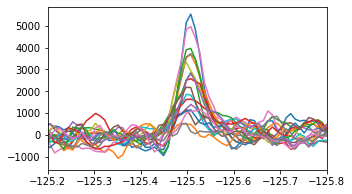

d_200_0uM_1


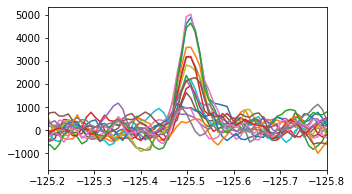

d_59_0uM_1


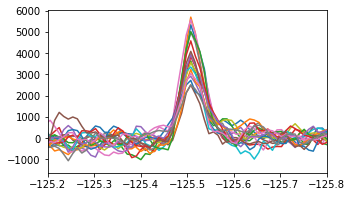

d_59_0uM_0


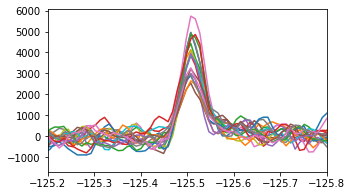

d_77_6uM_0


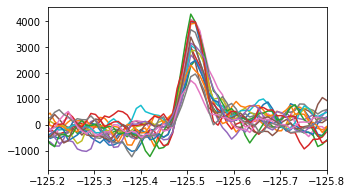

d_77_6uM_1


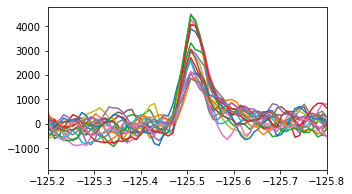

d_9_3uM_1


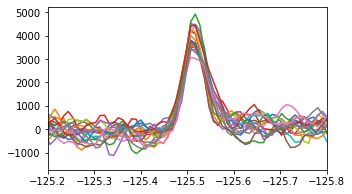

d_9_3uM_0


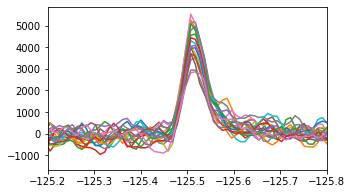

d_24_0uM_2


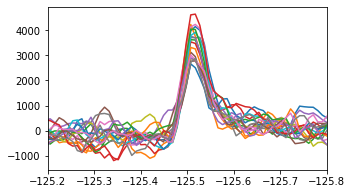

d_24_0uM_0


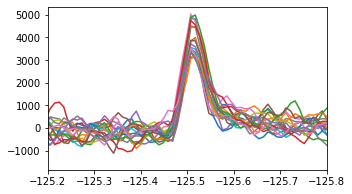

d_24_0uM_1


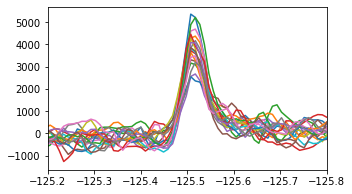

d_4_7uM_0


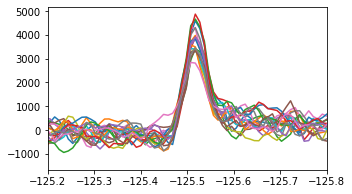

d_4_7uM_1


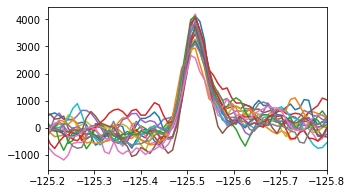

d_50_0uM_1


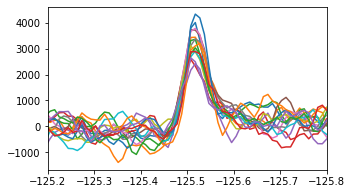

d_0_0uM_1


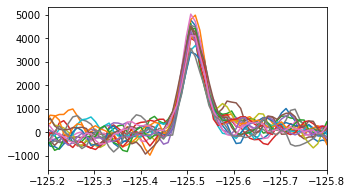

d_0_0uM_0


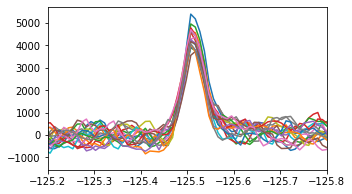

d_50_0uM_0


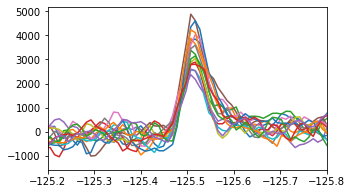

d_87_2uM_0


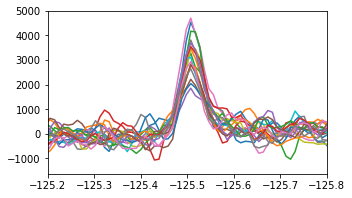

d_28_7uM_0


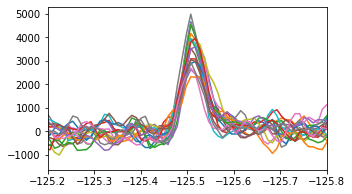

d_87_2uM_1


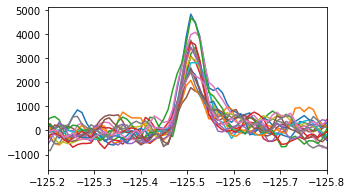

d_76_8uM_1


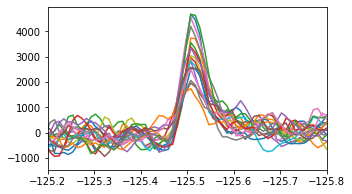

d_76_8uM_0


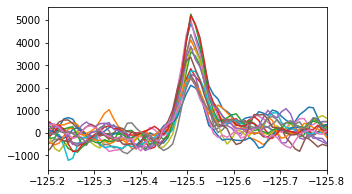

d_76_8uM_2


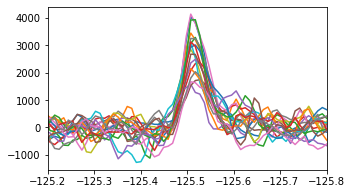

In [2]:
# Plot various 1D slices from each R2eff-CPMG experiment

# Create an instance of the fit_raw class
fit_1D_19F = fit_raw()

# Read and process data
dic, data = fit_1D_19F.read_data('../Data/19F_R2eff_ft2_data/')

# Check raw data
for key in data.keys():
    print(key)
    fig, ax = plt.subplots(figsize=(5,3))
    # Get the x-axis values (ppm_real)
    udic = ng.pipe.guess_udic(dic[key], data[key])
    ppm_real = np.linspace(-120+-(udic[1]['sw']/udic[1]['obs'])/2, -120+(udic[1]['sw']/udic[1]['obs'])/2, num=data[key][0].shape[0])
    for i in range(0,data[key].shape[0]):
    # Plot the slices 
        ax.plot(ppm_real, data[key][i], label=key + " uM")
        ax.set_xlim(-125.2, -125.8)
    plt.show()

Now fitting d_200_0uM_0


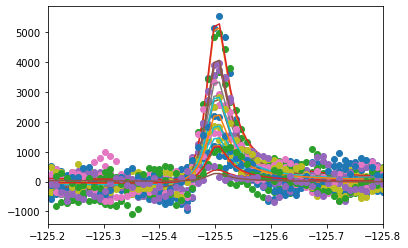

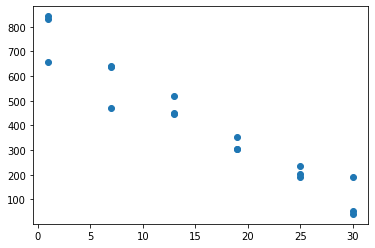

Now fitting d_200_0uM_1


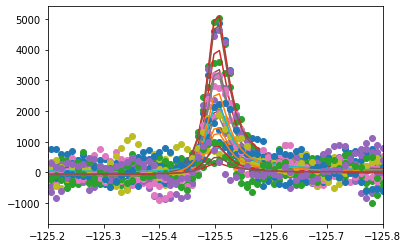

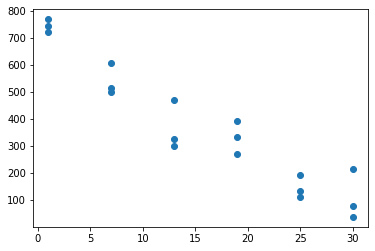

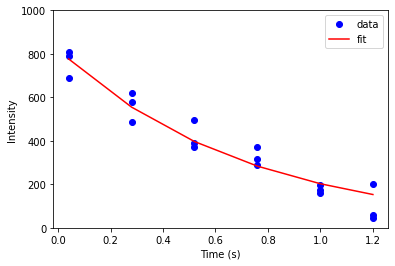

For 200.0 uM: R2: 1.400317387159132 +/- 0.11320134215024208 seconds^-1
Now fitting d_59_0uM_1


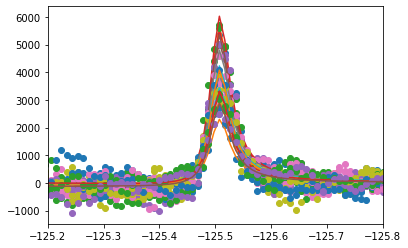

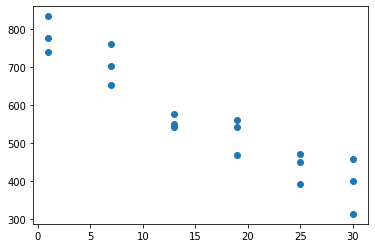

Now fitting d_59_0uM_0


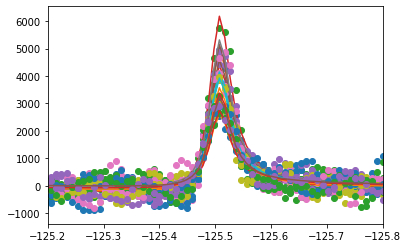

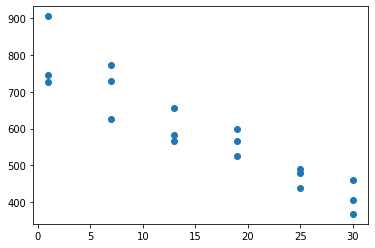

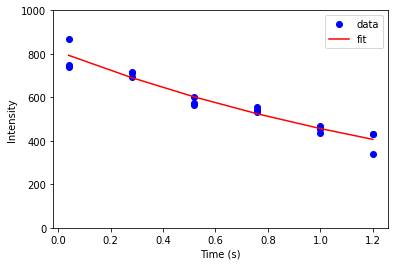

For 59.0 uM: R2: 0.5760502820912028 +/- 0.038096373281578715 seconds^-1
Now fitting d_77_6uM_0


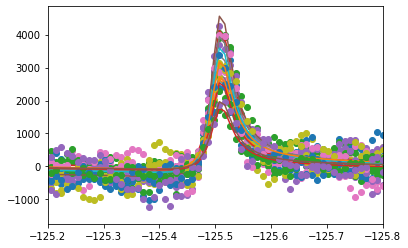

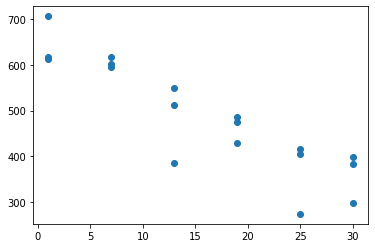

Now fitting d_77_6uM_1


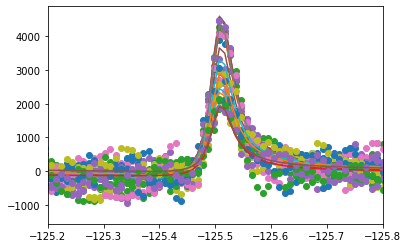

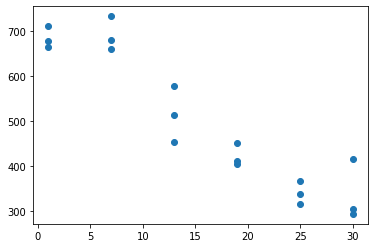

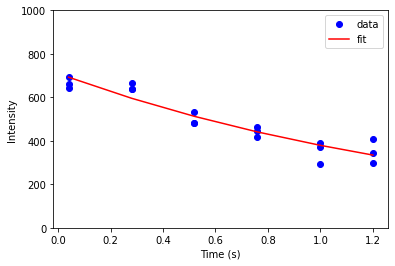

For 77.6 uM: R2: 0.6276452170788711 +/- 0.05333270487832364 seconds^-1
Now fitting d_9_3uM_1


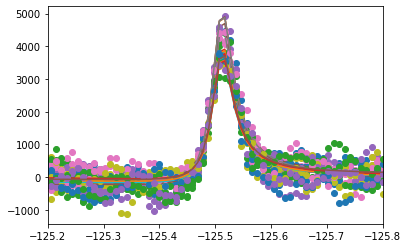

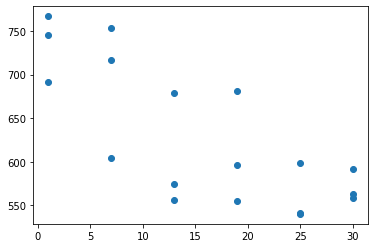

Now fitting d_9_3uM_0


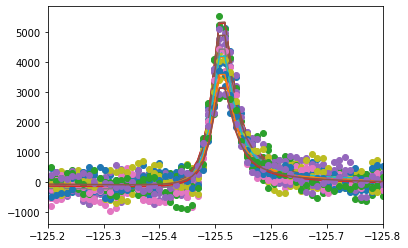

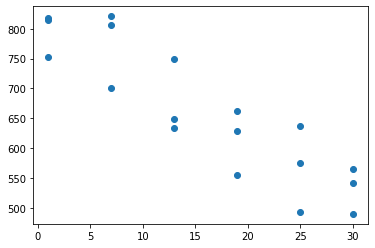

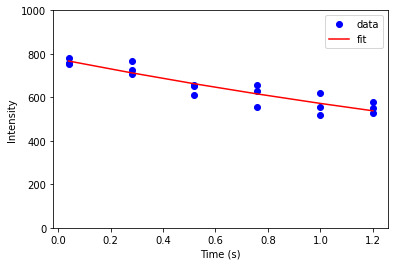

For 9.3 uM: R2: 0.30555016115313394 +/- 0.03184350634805815 seconds^-1
Now fitting d_24_0uM_2


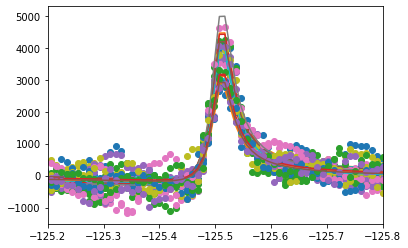

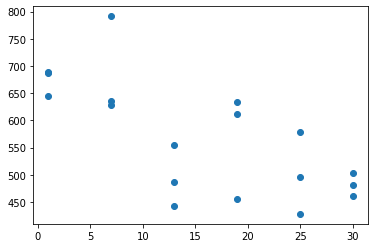

Now fitting d_24_0uM_0


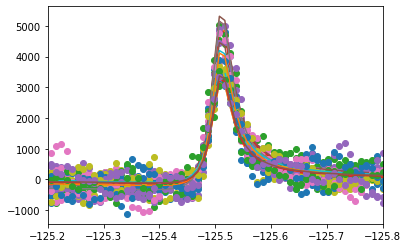

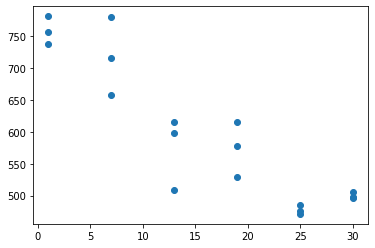

Now fitting d_24_0uM_1


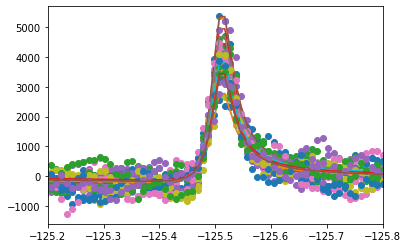

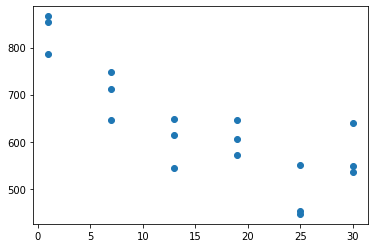

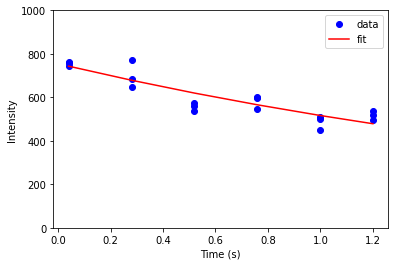

For 24.0 uM: R2: 0.379584876493286 +/- 0.0474411921032486 seconds^-1
Now fitting d_4_7uM_0


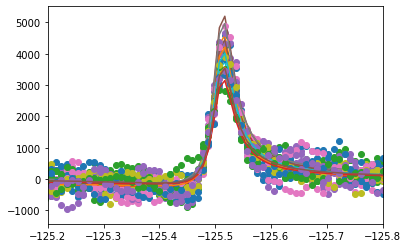

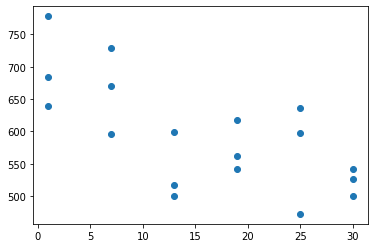

Now fitting d_4_7uM_1


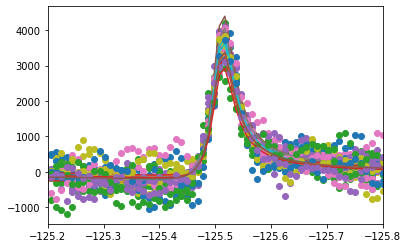

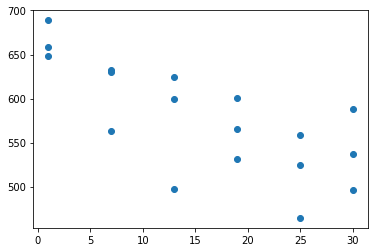

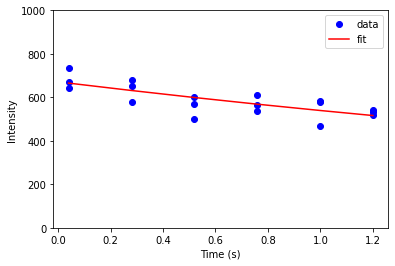

For 4.7 uM: R2: 0.21882958247462025 +/- 0.04589180114947258 seconds^-1
Now fitting d_50_0uM_1


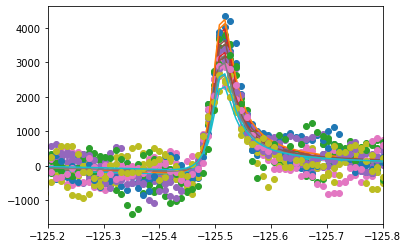

Now fitting d_50_0uM_0


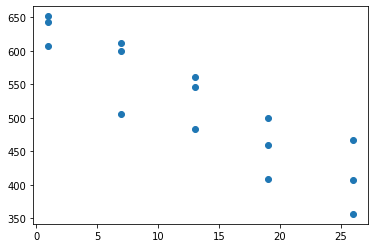

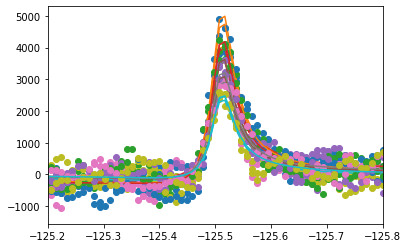

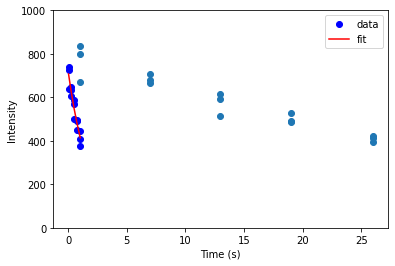

For 50.0 uM: R2: 0.5356453529211618 +/- 0.046808086026315025 seconds^-1
Now fitting d_0_0uM_1


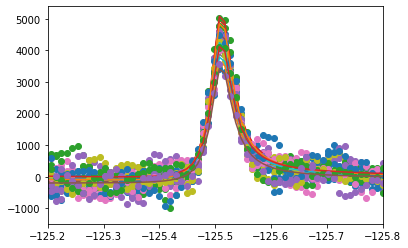

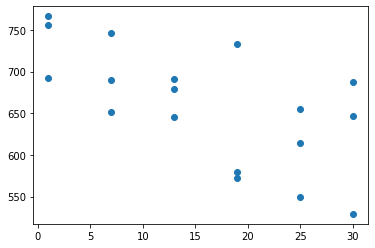

Now fitting d_0_0uM_0


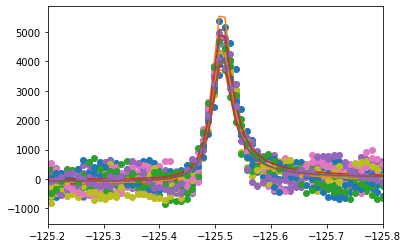

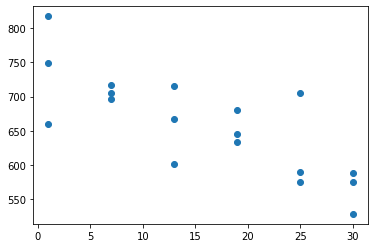

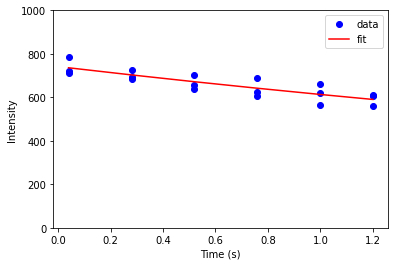

For 0.0 uM: R2: 0.19007558234981922 +/- 0.028860561486888616 seconds^-1
Now fitting d_87_2uM_0


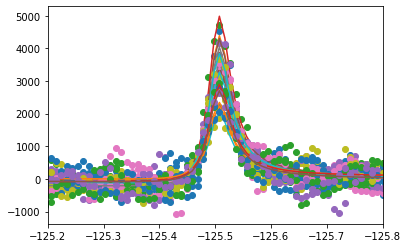

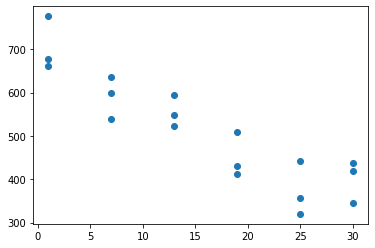

Now fitting d_87_2uM_1


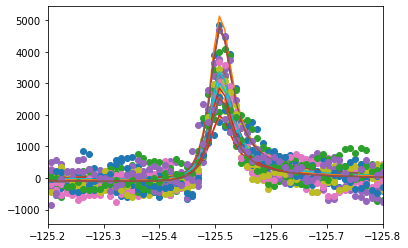

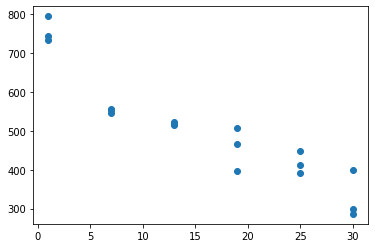

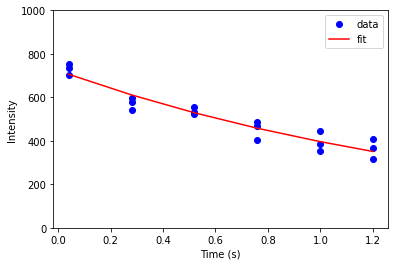

For 87.2 uM: R2: 0.6024793737011074 +/- 0.04539429715220052 seconds^-1
Now fitting d_28_7uM_0


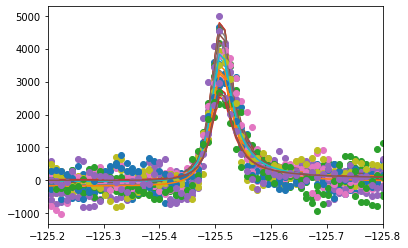

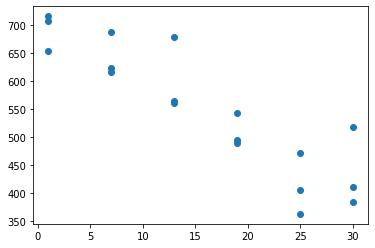

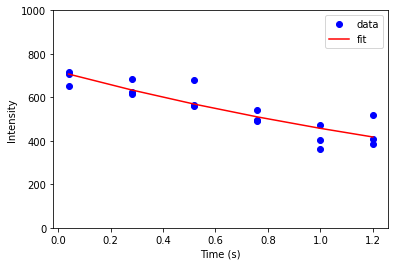

For 28.7 uM: R2: 0.4538550862503574 +/- 0.05665942812031167 seconds^-1
Now fitting d_76_8uM_1


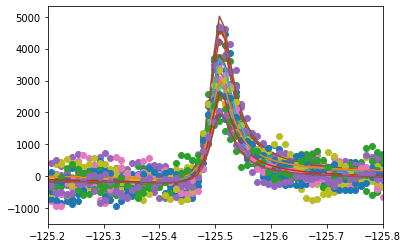

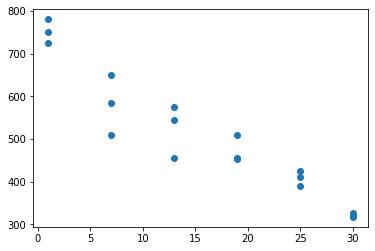

Now fitting d_76_8uM_0


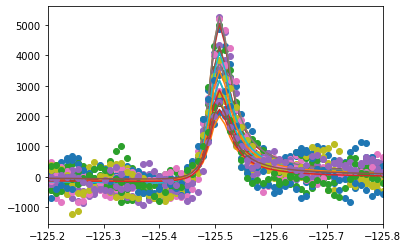

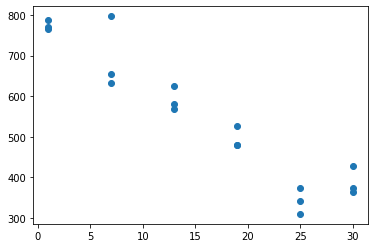

Now fitting d_76_8uM_2


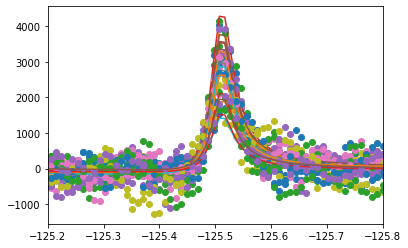

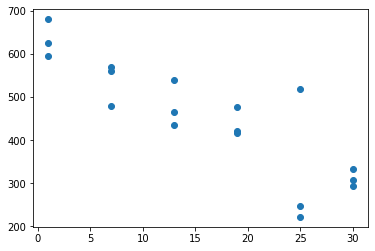

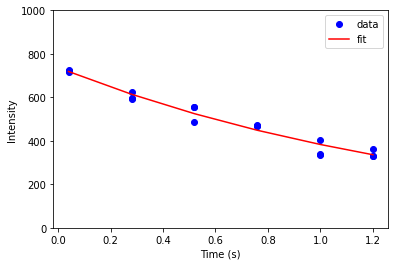

For 76.8 uM: R2: 0.6556337769809227 +/- 0.03188279676890743 seconds^-1


In [3]:
# Create a dictionary to group data by concentration
group_dict = {}
for key in data.keys():
    prefix = key.split('_')[1:3]
    prefix_dec = prefix[1].split('uM')
    join = prefix[0] + "." + "".join(prefix_dec)
    if join.startswith('d'):
        continue
    if join not in group_dict:
        group_dict[join] = []
    group_dict[join].append(key)

# Create a dictionary to store vals by concentration
concs_r2_av = {}
concs_r2_se = {}

vclist = np.asarray([1,7,13,19,25,30,1,7,13,19,25,30,1,7,13,19,25,30])
vclist_50 = np.asarray([1,7,13,19,26,1,7,13,19,26,1,7,13,19,26]) #the data for 50uM has a slightly different vclist

# Loop over grouped data, calculate average and standard error, and plot
for key in group_dict:
    # Calculate average and standard error
    ints = []
    if key != '50.0':
        for i in group_dict[key]:
            print('Now fitting', i)
            # fit each slice to get intensities
            intensities = fit_1D_19F.fit_pseudo2D(dic=dic[i], data_list=data[i])
            ints.append(intensities)
            plt.scatter(vclist,intensities)
            plt.show()
        # fit intensities to get R2
        popt, pcov, R2, R2err = fit_1D_19F.fit_R2_data(x=vclist*4.*0.01, y=np.mean(np.asarray(ints), axis=0) )
        print('For', key,'uM:', 'R2:', R2, '+/-', R2err, 'seconds^-1')

    if key == '50.0': #the data for 50uM has a slightly different vclist
        for i in group_dict[key]:
            print('Now fitting', i)
            # fit each slice to get intensities
            intensities = fit_1D_19F.fit_pseudo2D(dic=dic[i], data_list=data[i])
            ints.append(intensities)
            ints.append(intensities)
            plt.scatter(vclist_50,intensities)
        # fit intensities to get R2
        popt, pcov, R2, R2err = fit_1D_19F.fit_R2_data(x=vclist_50*4.*0.01, y=np.mean(np.asarray(ints), axis=0) )
        print('For', key,'uM:', 'R2:', R2, '+/-', R2err, 'seconds^-1')
    
    if key != '200.0':
        concs_r2_av[key] = R2
        concs_r2_se[key] = R2err


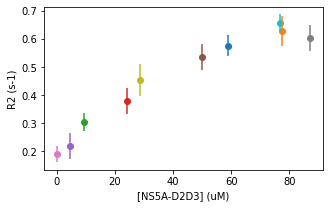

In [4]:
# plot R2 values as a function of NS5A-D2D3 concentration
fig, ax = plt.subplots(figsize=(5,3))
for key in concs_r2_av:
    ax.scatter(np.float(key), (concs_r2_av[key]))
    ax.errorbar(np.float(key), (concs_r2_av[key]), yerr=concs_r2_se[key])
ax.set_xlabel('[NS5A-D2D3] (uM)')
ax.set_ylabel('R2 (s-1)')
ax.ticklabel_format(useOffset=False)
plt.show()

In [5]:
# Save the dictionaries to json files in ../json to be used in tau_c_fit
with open('../json/R2_av.json', 'w') as outfile:
    json.dump(concs_r2_av, outfile)
    
with open('../json/R2_se.json', 'w') as outfile:
    json.dump(concs_r2_se, outfile)